# Connect to G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Notebook Default Directory

In [2]:
import os
file_dir = '/content/drive/MyDrive/repeating DSP_1'
os.chdir(file_dir)

In [3]:
!ls

'[Cleaned]Laptop_price.csv'  '[Complete]Laptop_Price.csv'   repeating_DSP1.ipynb


# Import Library


In [4]:
# Data Analysis Library
import pandas as pd
import numpy as np

# Data Viz Library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.despine()
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes',
       labelweight='bold',
       labelsize='large',
       titleweight='bold',
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<ipython-input-4-3c23c93c4177>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 640x480 with 0 Axes>

[RegEx Translator](https://https://www.regextranslator.com/)

# Load Dataset

In [5]:
 csv_filename = pd.read_csv('[Complete]Laptop_Price.csv')
 df = pd.DataFrame(csv_filename)
 df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame Info

In [6]:
df.shape

(1303, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observation :
* Tidak ada nilai null
* Inches dan Price_euros sudah benar dalam data numerik
* Kedepannya mengubah CPU, RAM, Memory akan diganti menjadi tipe numerik

## Describe DataFrame


In [8]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Using the 'describe' method of the DataFrame, we can get some first insights on the numerical columns.
* Laptop_id : min=1, max=1320 , kenapa ? shape nya tadi (1303, 13)
* Inches : min=10.1, max=18.4, mean=15.0
* Price_euros : min=174.0, max=6099.0

# Data Cleaning

## Lowering DataFrame's Columns names

In [9]:
df = df.rename(columns=str.lower)
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:
df = df.rename(columns={'price_euros':'price'})
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Check Missing Values

In [11]:
df.isna().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

## Check For Duplicates

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [13]:
df[df.duplicated]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


# Data Cleaning + Feature Engineering(FE)

## Laptop Id

In [14]:
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [15]:
idx = 0
for laptop_id in df['laptop_id']:
  if idx+1 != laptop_id:
    print(laptop_id)
    break
  idx += 1

66


In [16]:
df.loc[df['laptop_id'] == 66, :]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
64,66,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.0


In [17]:
df = df.drop(columns='laptop_id')
# df = df.drop('laptop_id', axis=1)
# df.drop(columns='laptop_id', inplace=True)

In [18]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Screen Resolution

In [19]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

Breakdown informasi :     
* Screen Type
* Resolution
* Touchscreen (Yes/No)
Ubah menjadi 3 kolom

### FE on Screen Resolution

In [20]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df['resolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: resolution, Length: 1303, dtype: object

In [21]:
df['screentype'] = df['screenresolution'].str.replace(r'(\d+x\d+)', '', regex=True)
df['screentype'] = df['screentype'].str.replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)', '', regex=True)
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [22]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype'] = df['screentype'].str.replace(r'(Touchscreen)', '', regex=True)
df['touchscreen']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1298    Touchscreen
1299    Touchscreen
1300            NaN
1301            NaN
1302            NaN
Name: touchscreen, Length: 1303, dtype: object

In [23]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [24]:
df['touchscreen'].value_counts(dropna=False)

NaN            1111
Touchscreen     192
Name: touchscreen, dtype: int64

In [25]:
# df['touchscreen'] = df['touchscreen'].replace('Touchscreen', 1)
# df['touchscreen'] = df['touchscreen'].replace(np.nan, 0)
df['touchscreen'] = df['touchscreen'].apply(lambda x: 1 if x=='Touchscreen' else 0)
df['touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: touchscreen, Length: 1303, dtype: int64

In [26]:
df['touchscreen'].value_counts()

0    1111
1     192
Name: touchscreen, dtype: int64

In [27]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPS Panel Retina Display,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPS Panel Retina Display,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPS Panel Retina Display,0


In [28]:
df['screentype'].value_counts()

                             549
                             314
IPS Panel                    265
                              75
IPS Panel                     72
IPS Panel Retina Display      17
IPS Panel                     11
Name: screentype, dtype: int64

In [29]:
df['screentype'].unique()

array(['IPS Panel Retina Display ', '', ' ', 'IPS Panel  ',
       'IPS Panel    ', '   ', 'IPS Panel '], dtype=object)

In [30]:
df['screentype'] = df['screentype'].replace(r' ', '', regex=True)
df['screentype']

0       IPSPanelRetinaDisplay
1                            
2                            
3       IPSPanelRetinaDisplay
4       IPSPanelRetinaDisplay
                ...          
1298                 IPSPanel
1299                 IPSPanel
1300                         
1301                         
1302                         
Name: screentype, Length: 1303, dtype: object

In [31]:
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [32]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype']

0       IPSPanelRetinaDisplay
1                         NaN
2                         NaN
3       IPSPanelRetinaDisplay
4       IPSPanelRetinaDisplay
                ...          
1298                 IPSPanel
1299                 IPSPanel
1300                      NaN
1301                      NaN
1302                      NaN
Name: screentype, Length: 1303, dtype: object

In [33]:
df['screentype'].value_counts(dropna=False)

NaN                      938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [34]:
df = df.drop(columns='screenresolution')

In [35]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0


In [36]:
df[df.touchscreen==0][['company', 'cpu', 'ram']]

,company,cpu,ram
0,Apple,Intel Core i5 2.3GHz,8GB
1,Apple,Intel Core i5 1.8GHz,8GB
2,HP,Intel Core i5 7200U 2.5GHz,8GB
3,Apple,Intel Core i7 2.7GHz,16GB
4,Apple,Intel Core i5 3.1GHz,8GB
...,...,...,...
1296,HP,Intel Celeron Dual Core N3060 1.6GHz,2GB
1297,Asus,Intel Core i7 6500U 2.5GHz,4GB
1300,Lenovo,Intel Celeron Dual Core N3050 1.6GHz,2GB
1301,HP,Intel Core i7 6500U 2.5GHz,6GB


In [37]:
df[(df.touchscreen==0) & (df.company!='Apple')][['company', 'cpu', 'ram']]

,company,cpu,ram
2,HP,Intel Core i5 7200U 2.5GHz,8GB
5,Acer,AMD A9-Series 9420 3GHz,4GB
8,Asus,Intel Core i7 8550U 1.8GHz,16GB
9,Acer,Intel Core i5 8250U 1.6GHz,8GB
10,HP,Intel Core i5 7200U 2.5GHz,4GB
...,...,...,...
1296,HP,Intel Celeron Dual Core N3060 1.6GHz,2GB
1297,Asus,Intel Core i7 6500U 2.5GHz,4GB
1300,Lenovo,Intel Celeron Dual Core N3050 1.6GHz,2GB
1301,HP,Intel Core i7 6500U 2.5GHz,6GB


## CPU

In [38]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [39]:
df['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: cpu, Length: 118, dtype: int64

In [40]:
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+\.\d+GHz)')
df['cpu_freq'].head()

0    2.3GHz
1    1.8GHz
2    2.5GHz
3    2.7GHz
4    3.1GHz
Name: cpu_freq, dtype: object

In [41]:
df['cpu_freq'] = df['cpu_freq'].str.replace(r'GHz', '')
df.rename(columns={'cpu_freq' : 'cpu_freq(GHz)'}, inplace=True)
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0,3.1


In [42]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)

In [43]:
df['cpu'] = df['cpu'].str.replace(r'(\d+\.\d+GHz)', '', regex=True)
df['cpu'].head()

0          Intel Core i5 
1          Intel Core i5 
2    Intel Core i5 7200U 
3          Intel Core i7 
4          Intel Core i5 
Name: cpu, dtype: object

In [44]:
df['cpu']

0                       Intel Core i5 
1                       Intel Core i5 
2                 Intel Core i5 7200U 
3                       Intel Core i7 
4                       Intel Core i5 
                     ...              
1298              Intel Core i7 6500U 
1299              Intel Core i7 6500U 
1300    Intel Celeron Dual Core N3050 
1301              Intel Core i7 6500U 
1302    Intel Celeron Dual Core N3050 
Name: cpu, Length: 1303, dtype: object

In [45]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0,3.1


## RAM

In [46]:
df['ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [47]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram' : 'ram(GB)'}, inplace=True)
df['ram(GB)'] = df['ram(GB)'].astype(int)

In [48]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0,3.1


In [49]:
df['ram(GB)'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: ram(GB), dtype: int64

## Memory(Drive)

In [50]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [51]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [52]:
df['memory_1'] = df['memory']
df['memory_1'] = df['memory_1'].str.replace('1.0TB', '1TB', regex=True)
df['memory_1'] = df['memory_1'].str.replace('1TB', '1000GB')
df['memory_1'] = df['memory_1'].str.replace('2TB', '2000GB')
df['memory_1'] = df['memory_1'].str.replace('GB', '')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [53]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0,1.8,128 Flash Storage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0,2.5,256 SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD


In [54]:
df['memory_2'] = df['memory_1'].str.replace(r' ', '')
df['memory_2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [55]:
memory_1 = []
memory_2 = []
for i in df['memory_2']:
  if len(re.findall(r'\+', i))==1:
    one = re.findall(r'(\w+)', i)
    memory_1.append(one[0])
    memory_2.append(one[1])
  else:
    one = re.findall(r'(\w+)', i)
    memory_1.append(one[0])
    memory_2.append('NaN')

### Contoh :

In [56]:
print(re.findall(r'\+', '240GB'))
print(re.findall(r'\w+', '256SSD+1000Hybrid'))

[]
['256SSD', '1000Hybrid']


In [57]:
print(re.findall(r'\+', '240SSD'))
print(re.findall(r'\w+', '240SSD'))

[]
['240SSD']


In [58]:
memory_1_gb = []
memory_1_type = []
for i in memory_1:
  memory_1_type.append(re.findall(r'(\D\w+)', i)[0])
  memory_1_gb.append(re.findall(r'(\d+)', i)[0])

In [59]:
memory_2_gb = []
memory_2_type = []
for i in memory_2:
  if i != 'NaN':
    memory_2_type.append(re.findall(r'(\D\w+)', i)[0])
    memory_2_gb.append(re.findall(r'(\d+)', i)[0])
  else:
    memory_2_type.append('NaN')
    memory_2_gb.append(0)

In [60]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD,128SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0,1.8,128 Flash Storage,128FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0,2.5,256 SSD,256SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD,512SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD,256SSD


In [61]:
df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [62]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD,128SSD,128,SSD,0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,1.8,128 Flash Storage,128FlashStorage,128,FlashStorage,0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,2.5,256 SSD,256SSD,256,SSD,0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD,512SSD,512,SSD,0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD,256SSD,256,SSD,0,NaN


In [63]:
df

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD,128SSD,128,SSD,0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,1.8,128 Flash Storage,128FlashStorage,128,FlashStorage,0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,2.5,256 SSD,256SSD,256,SSD,0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD,512SSD,512,SSD,0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD,256SSD,256,SSD,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,1920x1080,IPSPanel,1,2.5,128 SSD,128SSD,128,SSD,0,NaN
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,3200x1800,IPSPanel,1,2.5,512 SSD,512SSD,512,SSD,0,NaN
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,1366x768,NaN,0,1.6,64 Flash Storage,64FlashStorage,64,FlashStorage,0,NaN
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,1366x768,NaN,0,2.5,1000 HDD,1000HDD,1000,HDD,0,NaN


In [64]:
df.rename(columns={'memort_1_sto(GB)' : 'memory_1_sto(GB)'}, inplace=True)

In [65]:
df

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD,128SSD,128,SSD,0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,1.8,128 Flash Storage,128FlashStorage,128,FlashStorage,0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,2.5,256 SSD,256SSD,256,SSD,0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD,512SSD,512,SSD,0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD,256SSD,256,SSD,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,1920x1080,IPSPanel,1,2.5,128 SSD,128SSD,128,SSD,0,NaN
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,3200x1800,IPSPanel,1,2.5,512 SSD,512SSD,512,SSD,0,NaN
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,1366x768,NaN,0,1.6,64 Flash Storage,64FlashStorage,64,FlashStorage,0,NaN
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,1366x768,NaN,0,2.5,1000 HDD,1000HDD,1000,HDD,0,NaN


In [66]:
df['memory_1_sto(GB)'] = df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'] = df['memory_2_sto(GB)'].astype(float)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   cpu               1303 non-null   object 
 5   ram(GB)           1303 non-null   int64  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   object 
 10  price             1303 non-null   float64
 11  resolution        1303 non-null   object 
 12  screentype        365 non-null    object 
 13  touchscreen       1303 non-null   int64  
 14  cpu_freq(GHz)     1217 non-null   float64
 15  memory_1          1303 non-null   object 
 16  memory_2          1303 non-null   object 


In [68]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   cpu               1303 non-null   object 
 5   ram(GB)           1303 non-null   int64  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   object 
 10  price             1303 non-null   float64
 11  resolution        1303 non-null   object 
 12  screentype        365 non-null    object 
 13  touchscreen       1303 non-null   int64  
 14  cpu_freq(GHz)     1217 non-null   float64
 15  memory_1          1303 non-null   object 
 16  memory_2          1303 non-null   object 


In [70]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   cpu               1303 non-null   object 
 5   ram(GB)           1303 non-null   int64  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   object 
 10  price             1303 non-null   float64
 11  resolution        1303 non-null   object 
 12  screentype        365 non-null    object 
 13  touchscreen       1303 non-null   int64  
 14  cpu_freq(GHz)     1217 non-null   float64
 15  memory_1          1303 non-null   object 
 16  memory_2          1303 non-null   object 


In [72]:
col_to_move = df.pop(df.columns[17])
df.insert(14, col_to_move.name, col_to_move)
df

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1,memory_2,memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,128 SSD,128SSD,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,128.0,1.8,128 Flash Storage,128FlashStorage,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,256.0,2.5,256 SSD,256SSD,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,512 SSD,512SSD,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,256 SSD,256SSD,SSD,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,1920x1080,IPSPanel,1,128.0,2.5,128 SSD,128SSD,SSD,0.0,NaN
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,3200x1800,IPSPanel,1,512.0,2.5,512 SSD,512SSD,SSD,0.0,NaN
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,1366x768,NaN,0,64.0,1.6,64 Flash Storage,64FlashStorage,FlashStorage,0.0,NaN
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,1366x768,NaN,0,1000.0,2.5,1000 HDD,1000HDD,HDD,0.0,NaN


In [73]:
df = df.replace({'NaN' : np.nan})

In [74]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1,memory_2,memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,128 SSD,128SSD,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0,128.0,1.8,128 Flash Storage,128FlashStorage,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0,256.0,2.5,256 SSD,256SSD,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,512 SSD,512SSD,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,256 SSD,256SSD,SSD,0.0,NaN


## Weight

In [75]:
df['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [76]:
df['weight'].str.contains('kg').sum()

1303

In [77]:
df['weight'] = df['weight'].str.replace('kg', '').astype(float)

In [78]:
df.rename(columns={'weight' : 'weight(kg)'}, inplace=True)

In [79]:
df['weight(kg)'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: weight(kg), Length: 171, dtype: int64

In [80]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1,memory_2,memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,128 SSD,128SSD,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0,128.0,1.8,128 Flash Storage,128FlashStorage,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0,256.0,2.5,256 SSD,256SSD,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,512 SSD,512SSD,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,256 SSD,256SSD,SSD,0.0,NaN


## CPU & GPU Manufacturing Companies

In [81]:
df['cpu']

0                       Intel Core i5 
1                       Intel Core i5 
2                 Intel Core i5 7200U 
3                       Intel Core i7 
4                       Intel Core i5 
                     ...              
1298              Intel Core i7 6500U 
1299              Intel Core i7 6500U 
1300    Intel Celeron Dual Core N3050 
1301              Intel Core i7 6500U 
1302    Intel Celeron Dual Core N3050 
Name: cpu, Length: 1303, dtype: object

In [82]:
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [83]:
df = df.drop(columns = ['memory_1', 'memory_2'])

In [84]:
df[df['cpu_brand'] == 'Samsung']

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1,32.0,2.0,FlashStorage,0.0,NaN,Samsung


In [85]:
df = df.drop(1191)

In [86]:
df['cpu_brand'].value_counts()

Intel    1240
AMD        62
Name: cpu_brand, dtype: int64

In [87]:
df['gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: gpu, Length: 1302, dtype: object

In [88]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [89]:
 df[df['gpu_brand'] == 'ARM']

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand


In [90]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0,128.0,1.8,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0,256.0,2.5,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,SSD,0.0,NaN,Intel,Intel


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   memory            1302 non-null   object 
 7   gpu               1302 non-null   object 
 8   opsys             1302 non-null   object 
 9   weight(kg)        1302 non-null   float64
 10  price             1302 non-null   float64
 11  resolution        1302 non-null   object 
 12  screentype        364 non-null    object 
 13  touchscreen       1302 non-null   int64  
 14  memory_1_sto(GB)  1302 non-null   float64
 15  cpu_freq(GHz)     1216 non-null   float64
 16  memory_1_type     1302 non-null   object 


Now the dataset looks clean and ready to be explored

In [92]:
df.to_csv('[Cleaned]Laptop_price.csv', index = False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [93]:
!ls

'[Cleaned]Laptop_price.csv'  '[Complete]Laptop_Price.csv'   repeating_DSP1.ipynb


In [94]:
df1 = pd.read_csv('[Cleaned]Laptop_price.csv')
df1

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0,128.0,1.8,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0,256.0,2.5,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,SSD,0.0,NaN,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,1920x1080,IPSPanel,1,128.0,2.5,SSD,0.0,NaN,Intel,Intel
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,3200x1800,IPSPanel,1,512.0,2.5,SSD,0.0,NaN,Intel,Intel
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,1366x768,NaN,0,64.0,1.6,FlashStorage,0.0,NaN,Intel,Intel
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1366x768,NaN,0,1000.0,2.5,HDD,0.0,NaN,Intel,AMD


In [95]:
df_clean = df1.copy()

In [96]:
df1

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0,128.0,1.8,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0,256.0,2.5,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,SSD,0.0,NaN,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,1920x1080,IPSPanel,1,128.0,2.5,SSD,0.0,NaN,Intel,Intel
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,3200x1800,IPSPanel,1,512.0,2.5,SSD,0.0,NaN,Intel,Intel
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,1366x768,NaN,0,64.0,1.6,FlashStorage,0.0,NaN,Intel,Intel
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1366x768,NaN,0,1000.0,2.5,HDD,0.0,NaN,Intel,AMD


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   memory            1302 non-null   object 
 7   gpu               1302 non-null   object 
 8   opsys             1302 non-null   object 
 9   weight(kg)        1302 non-null   float64
 10  price             1302 non-null   float64
 11  resolution        1302 non-null   object 
 12  screentype        364 non-null    object 
 13  touchscreen       1302 non-null   int64  
 14  memory_1_sto(GB)  1302 non-null   float64
 15  cpu_freq(GHz)     1216 non-null   float64
 16  memory_1_type     1302 non-null   object 


## Custom function to improve plot readability

In [98]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the DataFrame ?

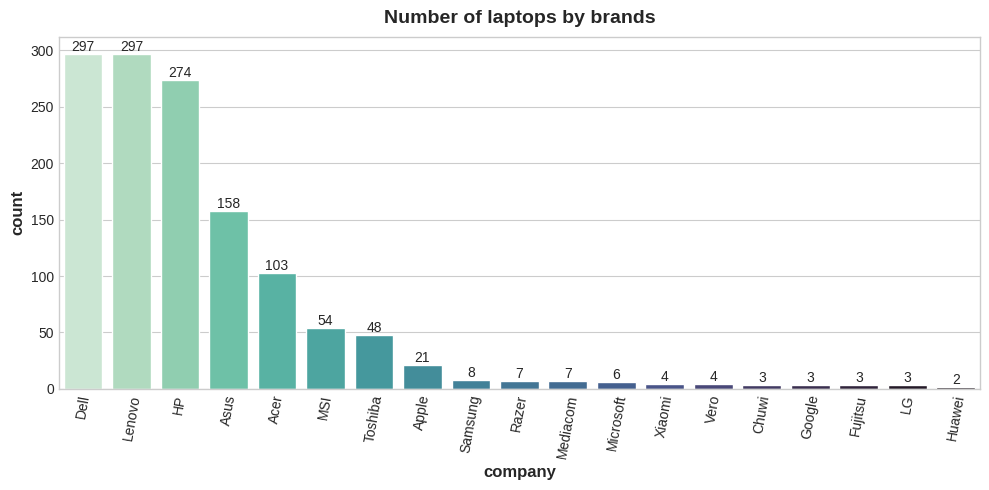

In [99]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, palette='mako_r', order = df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

## What type of laptop is the most frequent?

In [100]:
df['typename'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: typename, dtype: int64

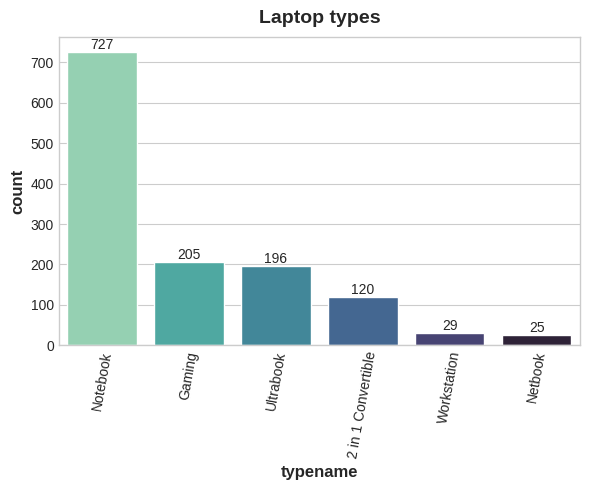

In [101]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename', data=df, palette='mako_r', order=df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

## Which size is the most popular?

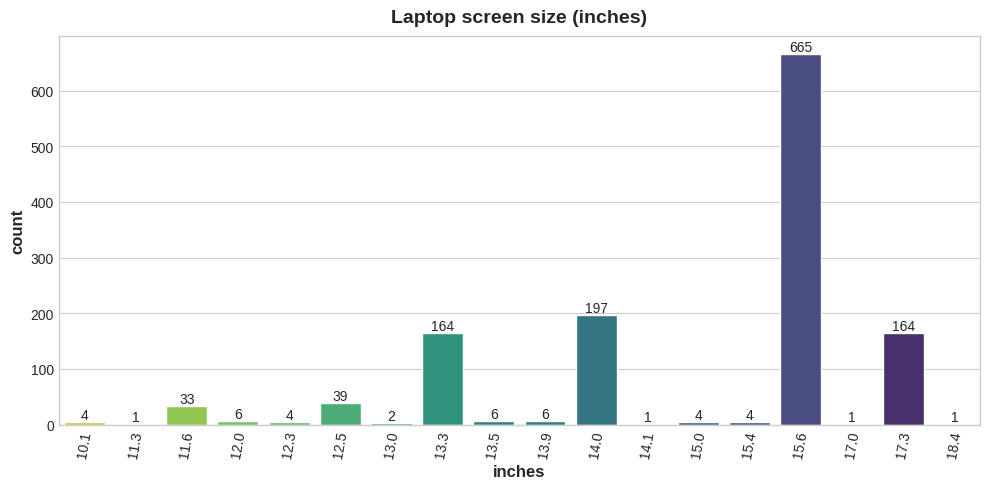

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [103]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df[df['inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 51.08% of the total laptops


In [104]:
inches_list = df['inches'].value_counts().index[:6].tolist()
inches_list

[15.6, 14.0, 13.3, 17.3, 12.5, 11.6]

In [105]:
df_clean = df_clean[df_clean['inches'].isin(inches_list)]

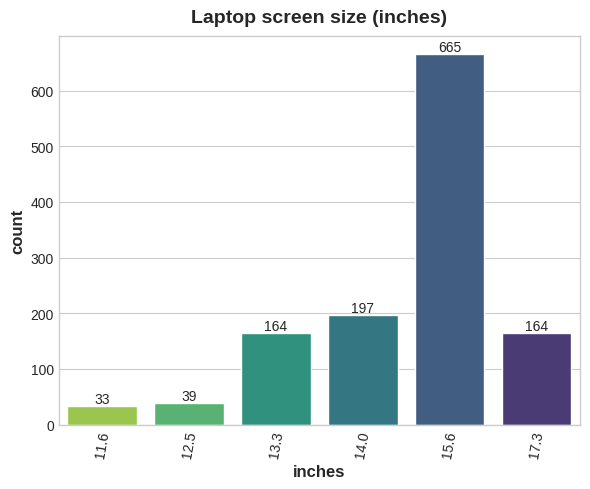

In [106]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='inches', data=df_clean, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [107]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 40 outliers!


## How is weight distributed among the laptops?

In [108]:
df_sorted = df.sort_values(by='weight(kg)', ascending=False)
df_sorted

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Intel Core i7 7820HK,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,...,1920x1080,NaN,0,512.0,2.90,SSD,1000.0,HDD,Intel,Nvidia
577,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,Intel Core i7 6820HK,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,...,1920x1080,IPSPanel,0,256.0,2.70,SSD,1000.0,HDD,Intel,Nvidia
1048,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,Intel Core i7 6700HQ,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.60,...,1920x1080,IPSPanel,0,128.0,2.60,SSD,1000.0,HDD,Intel,Nvidia
1081,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,Intel Core i7 6820HK,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,...,1920x1080,IPSPanel,0,512.0,2.70,SSD,1000.0,Hybrid,Intel,Nvidia
1116,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,Intel Core i7 6820HK,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,...,1920x1080,IPSPanel,0,256.0,2.70,SSD,1000.0,Hybrid,Intel,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Samsung,Notebook 9,Ultrabook,13.3,Intel Core i7 7500U,16,256GB SSD,Intel HD Graphics 620,Windows 10,0.81,...,1920x1080,NaN,0,256.0,2.70,SSD,0.0,NaN,Intel,Intel
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,Intel Atom x5-Z8550,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,...,1920x1200,IPSPanel,1,64.0,1.44,FlashStorage,0.0,NaN,Intel,Intel
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,Intel Atom x5-Z8550,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,...,1920x1200,IPSPanel,1,64.0,1.44,FlashStorage,0.0,NaN,Intel,Intel
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,Intel Atom x5-Z8550,4,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,...,1920x1200,IPSPanel,1,64.0,1.44,FlashStorage,0.0,NaN,Intel,Intel


In [109]:
df['weight(kg)'].value_counts().sort_values(ascending = False)

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
3.74      1
2.79      1
1.55      1
1.19      1
2.34      1
Name: weight(kg), Length: 171, dtype: int64

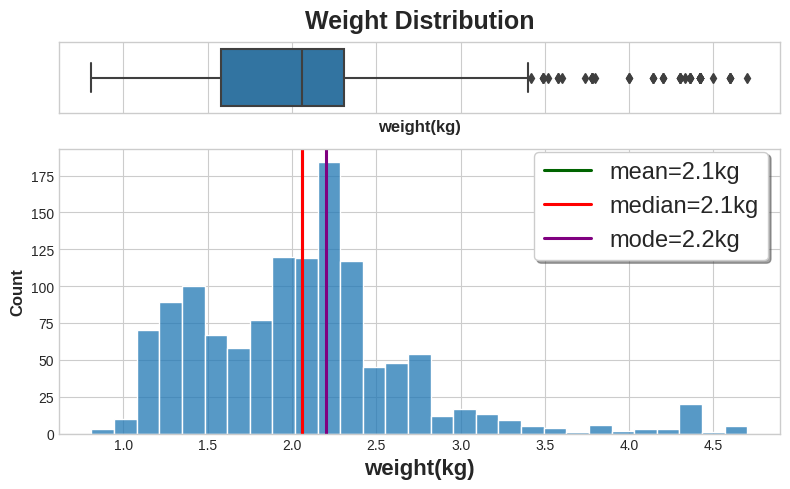

In [110]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution','kg')

## How is price distributed among the laptops?

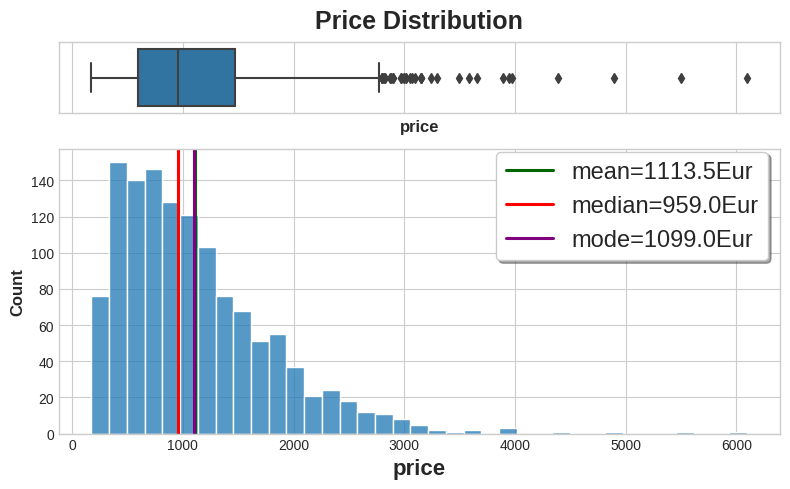

In [111]:
num_plot(df_clean, 'price', 'Price Distribution','Eur')

## How is RAM distributed among the laptops?

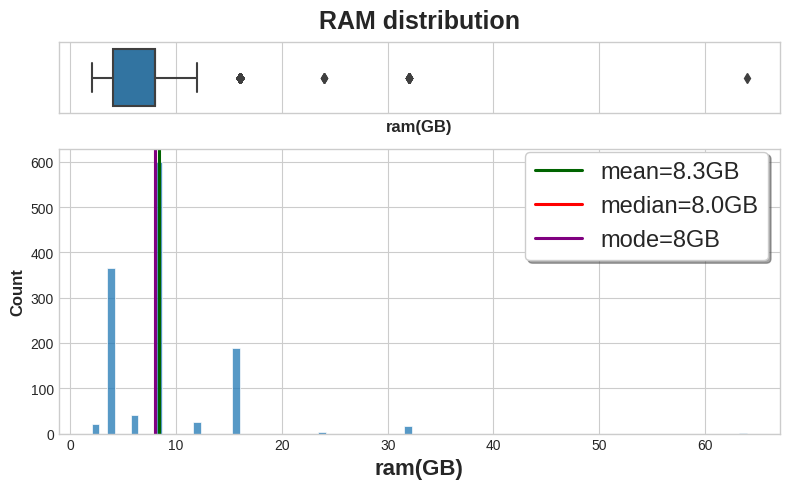

In [112]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [113]:
df['cpu_freq(GHz)'].value_counts()

2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
2.00     18
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: cpu_freq(GHz), dtype: int64

In [114]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,128.0,2.3,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0,128.0,1.8,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0,256.0,2.5,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0,512.0,2.7,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0,256.0,3.1,SSD,0.0,NaN,Intel,Intel


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   memory            1302 non-null   object 
 7   gpu               1302 non-null   object 
 8   opsys             1302 non-null   object 
 9   weight(kg)        1302 non-null   float64
 10  price             1302 non-null   float64
 11  resolution        1302 non-null   object 
 12  screentype        364 non-null    object 
 13  touchscreen       1302 non-null   int64  
 14  memory_1_sto(GB)  1302 non-null   float64
 15  cpu_freq(GHz)     1216 non-null   float64
 16  memory_1_type     1302 non-null   object 


In [116]:
# Menampilkan value counts untuk memory_1_type
print("Memory 1 Type:")
print(df['memory_1_type'].value_counts())
print("\n")

# Menampilkan value counts untuk memory_2_type
print("Memory 2 Type:")
print(df['memory_2_type'].value_counts())


Memory 1 Type:
SSD             843
HDD             375
FlashStorage     74
Hybrid           10
Name: memory_1_type, dtype: int64


Memory 2 Type:
HDD       202
SSD         4
Hybrid      2
Name: memory_2_type, dtype: int64


In [117]:
df['memory_1_sto(GB)'].value_counts()

256.0     508
1000.0    250
128.0     177
512.0     140
500.0     132
32.0       44
64.0       17
2000.0     16
16.0       10
180.0       5
240.0       1
8.0         1
508.0       1
Name: memory_1_sto(GB), dtype: int64

In [119]:
df['memory_2_sto(GB)'].value_counts()

0.0       1094
1000.0     187
2000.0      15
256.0        3
500.0        2
512.0        1
Name: memory_2_sto(GB), dtype: int64

In [118]:
df['memory_1_type'].value_counts()

SSD             843
HDD             375
FlashStorage     74
Hybrid           10
Name: memory_1_type, dtype: int64

In [121]:
df[df['memory_1_type'] == 'Hybrid']

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,memory_1_sto(GB),cpu_freq(GHz),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
151,Dell,Inspiron 7567,Gaming,15.6,Intel Core i7 7700HQ,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,...,1920x1080,NaN,0,1000.0,2.8,Hybrid,0.0,NaN,Intel,Nvidia
976,Lenovo,ThinkPad T460,Notebook,14.0,Intel Core i5 6200U,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70,...,1366x768,NaN,0,508.0,2.3,Hybrid,0.0,NaN,Intel,Intel
1010,Dell,Inspiron 7567,Gaming,15.6,Intel Core i5 7300HQ,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,...,1920x1080,NaN,0,1000.0,2.5,Hybrid,0.0,NaN,Intel,Nvidia
1135,Lenovo,IdeaPad 500-15ISK,Notebook,15.6,Intel Core i7 6500U,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,...,1920x1080,NaN,0,1000.0,2.5,Hybrid,0.0,NaN,Intel,AMD
1158,Lenovo,B51-80 (i5-6200U/8GB/1008GB/Radeon,Notebook,15.6,Intel Core i5 6200U,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.50,...,1920x1080,NaN,0,1000.0,2.3,Hybrid,0.0,NaN,Intel,AMD
1176,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Intel Core i7 6500U,4,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32,...,1920x1080,NaN,0,1000.0,2.5,Hybrid,0.0,NaN,Intel,Intel
1258,Lenovo,B51-80 (i7-6500U/8GB/1008GB/Radeon,Notebook,15.6,Intel Core i7 6500U,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,...,1920x1080,NaN,0,1000.0,2.5,Hybrid,0.0,NaN,Intel,AMD
1266,HP,Pavilion 15-AW003nv,Notebook,15.6,AMD A9-Series 9410,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,...,1920x1080,NaN,0,1000.0,2.9,Hybrid,0.0,NaN,AMD,AMD
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,AMD A9-Series 9410,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,...,1920x1080,NaN,0,1000.0,2.9,Hybrid,0.0,NaN,AMD,AMD
1294,HP,Pavilion 15-AW003nv,Notebook,15.6,AMD A9-Series 9410,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,...,1920x1080,NaN,0,1000.0,2.9,Hybrid,0.0,NaN,AMD,AMD


In [123]:
gpu_list = df_clean['gpu'].value_counts()[:5].index.tolist()

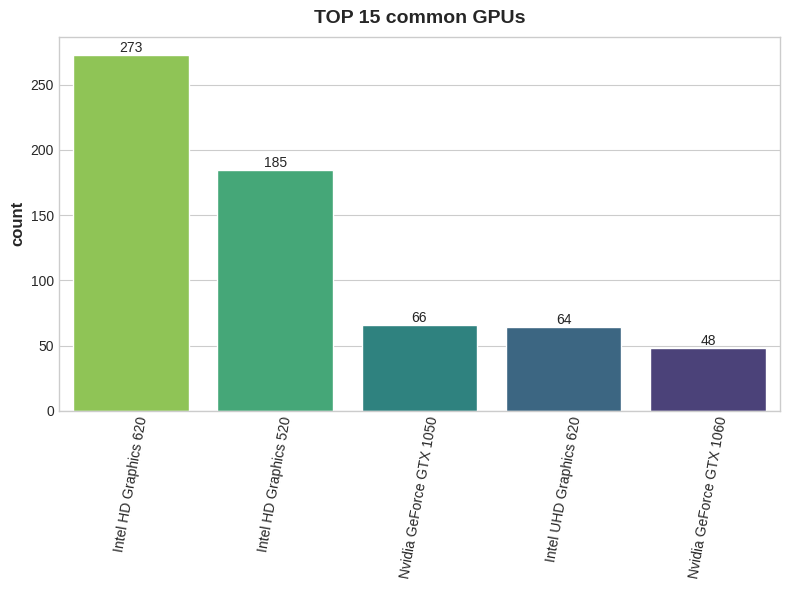

In [124]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu', data=df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()